# Give Life: Predict Blood Donations


### Problem Formulation

**The Goal**: Predict whether a person donated blood in March 2007 based on other donation information, as a way of forecasting blood supply. This is a binary classification problem - either a person did or did not donate.


### Exploratory Data Analysis

Let's first download the data and look at some statistics. 

According to the dataset page on the UCI repository site, (https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center), "These 748 donor data, each one included
- R (Recency - months since last donation)
- F (Frequency - total number of donation)
- M (Monetary - total blood donated in c.c.)
- T (Time - months since first donation)
- a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood)

In [94]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# The data is a csv file - read it with pandas
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")


In [96]:
data.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [98]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [99]:
data.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [100]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [103]:
data.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)
print(data.target.value_counts(normalize=True).round(3))

0    0.762
1    0.238
Name: target, dtype: float64


We can see some of the data and metadata above and make some notes
- all columns are numeric
- there are no missing values
- the target variable is coded as 0/1
- the features have different units and scales
- the frequency of donations is directly correlated to the total amount of blood donated
- Time since first donation seems to have little correlation with the target variable

Let's look at some plots:

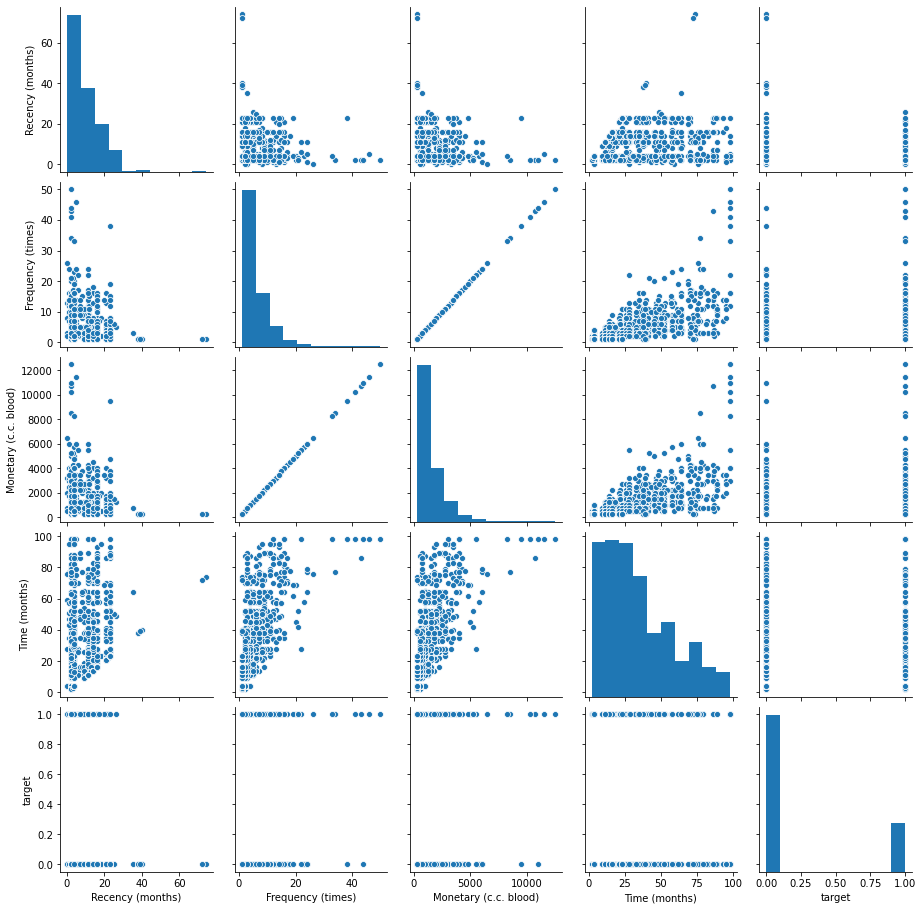

In [104]:
sns.pairplot(data)

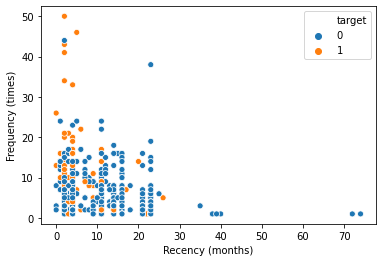

In [105]:
sns.scatterplot('Recency (months)', 'Frequency (times)',
                 data = data, hue='target')

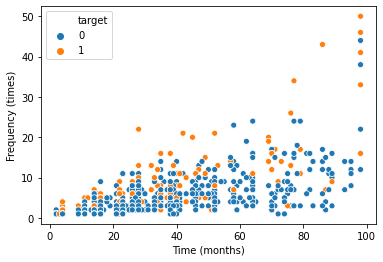

In [106]:
sns.scatterplot('Time (months)', 'Frequency (times)',
                 data = data, hue='target')

There doesn't seem to be any clear grouping in the plots above. From this exploratory analysis we have concluded:
- we need to scale and standardise the data
- we do not need both the Frequency and Monetary features


### Data Processing and Feature Engineering
Checklist:
- Encoding categorical variables - there are none
- Handling missing data - there is none
- Are the features all numerical? Yes

What we need to do
- drop one of the highly correlated features
- standardise and scale the features

We will split the data into train and test sets first to avoid data leakage as a result of using information about the test data distribution to scale the train data:

In [107]:
data = data.drop('Monetary (c.c. blood)', axis = 1)
data.head()

,Recency (months),Frequency (times),Time (months),target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [109]:
from sklearn.model_selection import train_test_split

# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  = train_test_split(data.drop(columns="target"), 
                                                   data.target,
                                                   test_size=0.2,
                                                   stratify=data.target,
                                                   random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,
                                                  test_size=0.2,
                                                  random_state=1111)


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Now we've completed our preprocessing and feature engineering, and we have our train and test data sets, so we can start training our model.

### Model Training

Let's try a few basic models first:

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

base_models = {"LR": LogisticRegression(),
               "KNN": KNeighborsClassifier(n_neighbors=3),
               "SVC": LinearSVC()}

model_scores = []

for name, model in base_models.items():
    
    model.fit(X_train_scaled, y_train)
    model_scores.append((name,model.score(X_train_scaled, y_train),model.score(X_val_scaled, y_val)))

print(model_scores)


[('LR', 0.7719665271966527, 0.7666666666666667), ('KNN', 0.8158995815899581, 0.7583333333333333), ('SVC', 0.7677824267782427, 0.7833333333333333)]


/Users/davidcleary/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


We see that all 3 models achieve a decent accuracy, and that their validation scores are similar to their training scores so they don't seem to be subject to overfitting. KNN has the best base score here so we move forward with this model. We will tune the number of nearest neighbours to consider using a randomized search and cross validation.

In [118]:
param_dist = {"n_neighbors": [2,3,4,5]}
              
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
        estimator=base_models['KNN'],
        param_distributions=param_dist,
        n_iter=4,
        cv=5,
        scoring='accuracy')

random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=4, param_distributions={'n_neighbors': [2, 3, 4, 5]},
                   scoring='accuracy')

In [119]:
random_search.best_score_

0.7449342105263158

In [120]:
random_search.best_params_

{'n_neighbors': 4}

We see that the best result is given by using 4 nearest neighbours and it gives us a score of 0.744. Let's take this model and evaluate it on the test data.

In [121]:
X_test_scaled = scaler.transform(X_test)

y_pred = random_search.best_estimator_.predict(X_test_scaled)

random_search.score(X_test_scaled, y_test)

0.7866666666666666

In [122]:
import joblib

filename = "KNN_Blood_Donations.joblib"

# save model
joblib.dump(random_search, filename)

['KNN_Blood_Donations.joblib']